In [142]:
%load_ext watermark
%watermark -p tensorflow,skimage,matplotlib,numpy,random

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
tensorflow 1.4.1
skimage 0.13.1
matplotlib 2.0.2
numpy 1.13.1
random n


In [143]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

In [146]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
   
    labels = []
    images = []
    
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/jm186072/Documents/DataScience/Deep Learning/Belgian-Traffic-Signs"
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_dir)

In [147]:
#print(labels)
#print(len(images))
#print(len(labels))
#print(images[0])


In [148]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the `images` dimensions
#print(images_array.ndim)

# Print the number of `images`'s elements
#print(images_array.size)

# Print the first instance of `images`


#print(len(images_array[0][0]))
#print(len(images_array[0][0][0]))


# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

labels_array

1
4575
62


array([ 0,  0,  0, ..., 61, 61, 61])

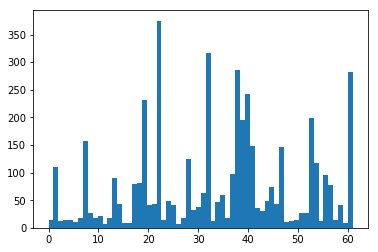

In [149]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

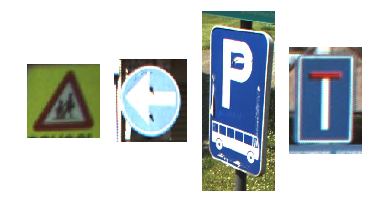

In [150]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=.2)

plt.show()

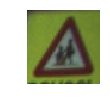

shape: (62, 61, 3), min: 3, max: 160


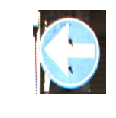

shape: (110, 96, 3), min: 3, max: 255


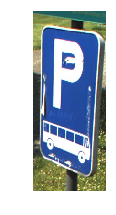

shape: (379, 153, 3), min: 0, max: 255


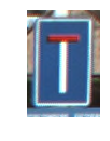

shape: (100, 68, 3), min: 17, max: 255


In [151]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.2)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

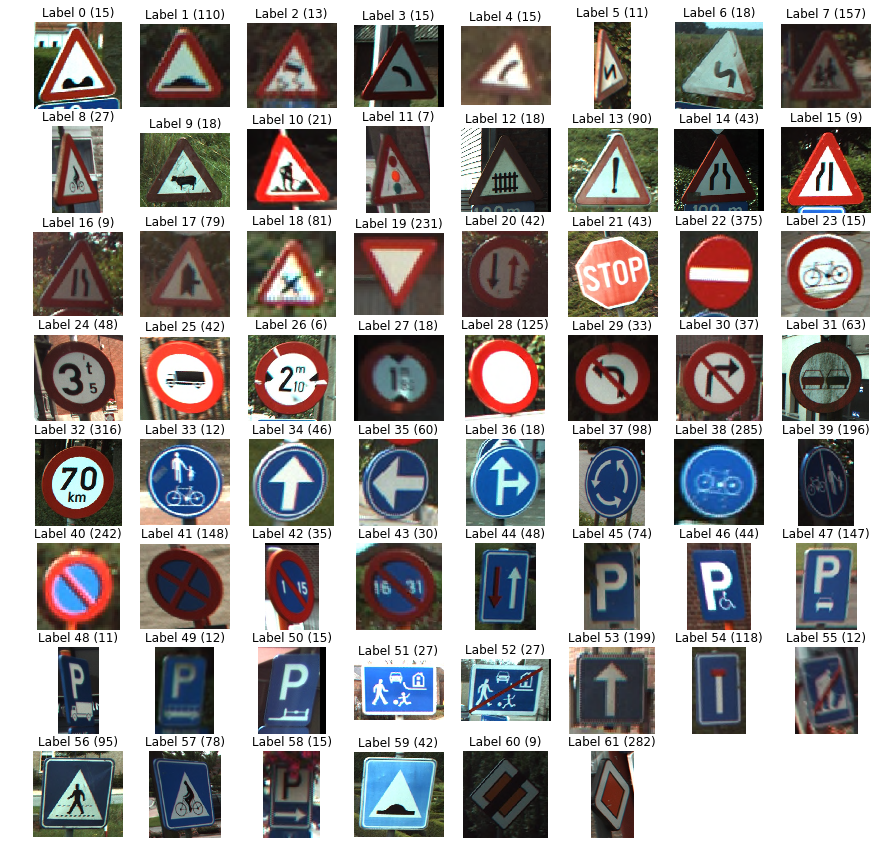

In [152]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

def display_images_and_labels(images,labels):
    # Get the unique labels 
    unique_labels = set(labels)

    # Initialize the figure
    plt.figure(figsize=(15, 15))

    # Set a counter
    i = 1

    # For each unique label,
    for label in unique_labels:
        # You pick the first image for each label
        image = images[labels.index(label)]
        # Define 64 subplots 
        plt.subplot(8, 8, i)
        # Don't include axes
        plt.axis('off')
        # Add a title to each subplot 
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        # Add 1 to the counter
        i += 1
        # And you plot this first image 
        plt.imshow(image)

    # Show the plot
    plt.show()

display_images_and_labels(images, labels)

In [153]:
# Resize images
images28 = [transform.resize(image, (28, 28)) for image in images]

images28 = np.array(images28)

images28 = rgb2gray(np.array(images28))

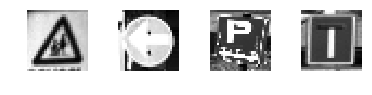

In [154]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

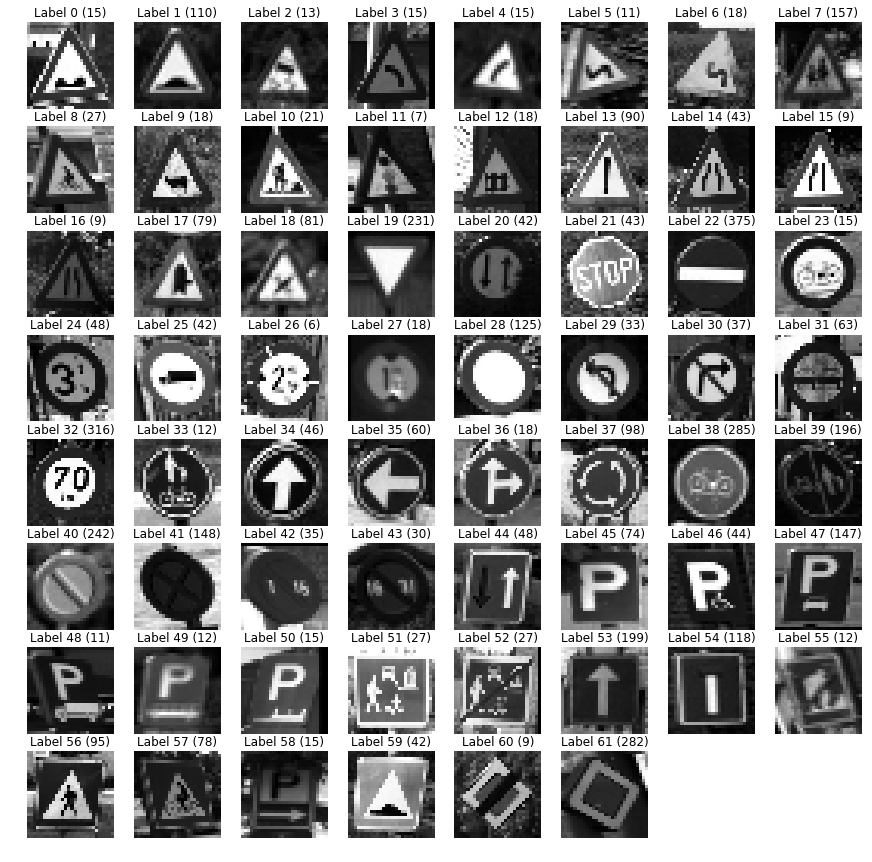

In [155]:
#plotting an overview of all the 62 classes and one image that belongs to each class, But this time in the gray scale.

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images28[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image,cmap="gray")
    
# Show the plot
plt.show()

In [170]:
x            = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y            = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat  = tf.contrib.layers.flatten(x)
logits       = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss         = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
accuracy     = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
train_op     = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)


In [157]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

('images_flat: ', <tf.Tensor 'Flatten_4/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected_4/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean_8:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax_4:0' shape=(?,) dtype=int64>)


In [158]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

In [159]:

for i in range(201):
        _, loss_val = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
        
        if i % 10 == 0:
            print("Loss: ", loss_val)

('Loss: ', 4.2220001)
('Loss: ', 2.1869588)
('Loss: ', 1.8256643)
('Loss: ', 1.6549621)
('Loss: ', 1.5488238)
('Loss: ', 1.474906)
('Loss: ', 1.4197345)
('Loss: ', 1.3765928)
('Loss: ', 1.3417258)
('Loss: ', 1.3127773)
('Loss: ', 1.2882688)
('Loss: ', 1.2671825)
('Loss: ', 1.2487936)
('Loss: ', 1.2322867)
('Loss: ', 1.2175289)
('Loss: ', 1.2043593)
('Loss: ', 1.1925007)
('Loss: ', 1.1817558)
('Loss: ', 1.1719359)
('Loss: ', 1.1628423)
('Loss: ', 1.1544969)


In [160]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
print(sample_labels)
print(predicted)

[21, 32, 22, 41, 39, 12, 19, 38, 22, 22]
[38 32 22 41 39  7 19 38 22 22]


In [161]:
print(sample_indexes)

[1055, 2106, 1143, 3202, 2763, 440, 771, 2551, 1199, 1122]


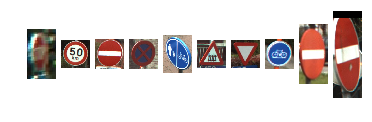

In [162]:
for i in range(len(sample_indexes)):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(images[sample_indexes[i]])
    plt.subplots_adjust(wspace=.2)

plt.show()

In [163]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

In [164]:
# Load the test dataset.
test_images, test_labels = load_data(test_data_dir)

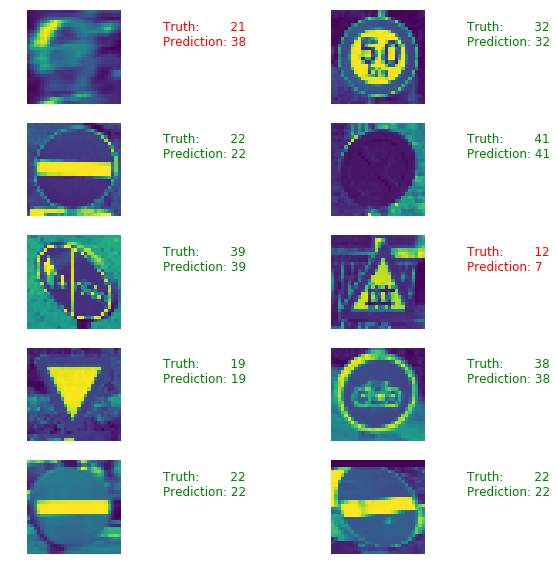

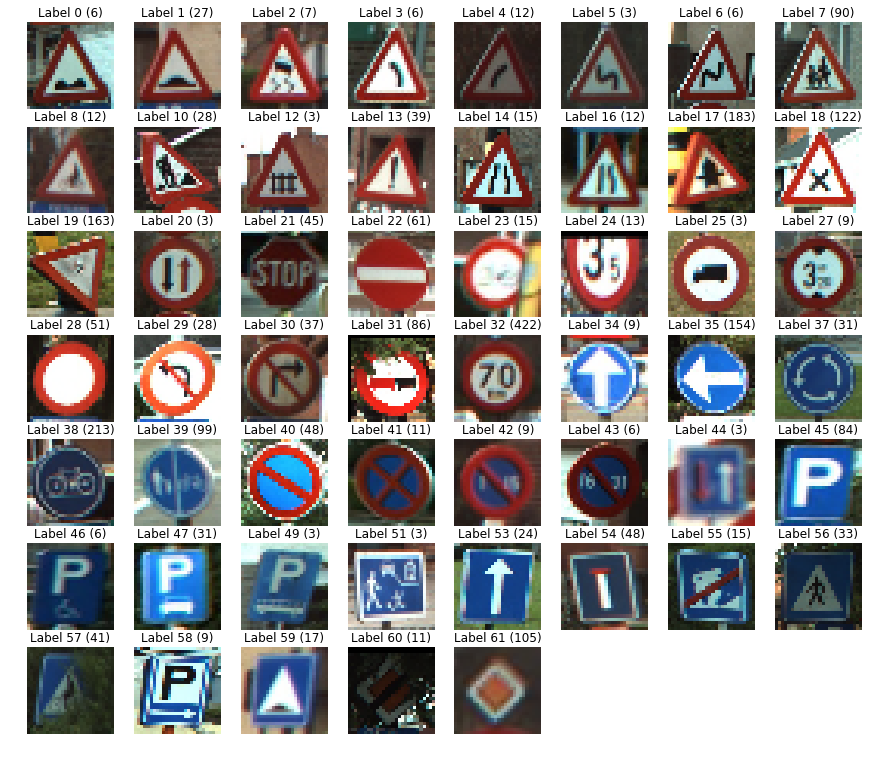

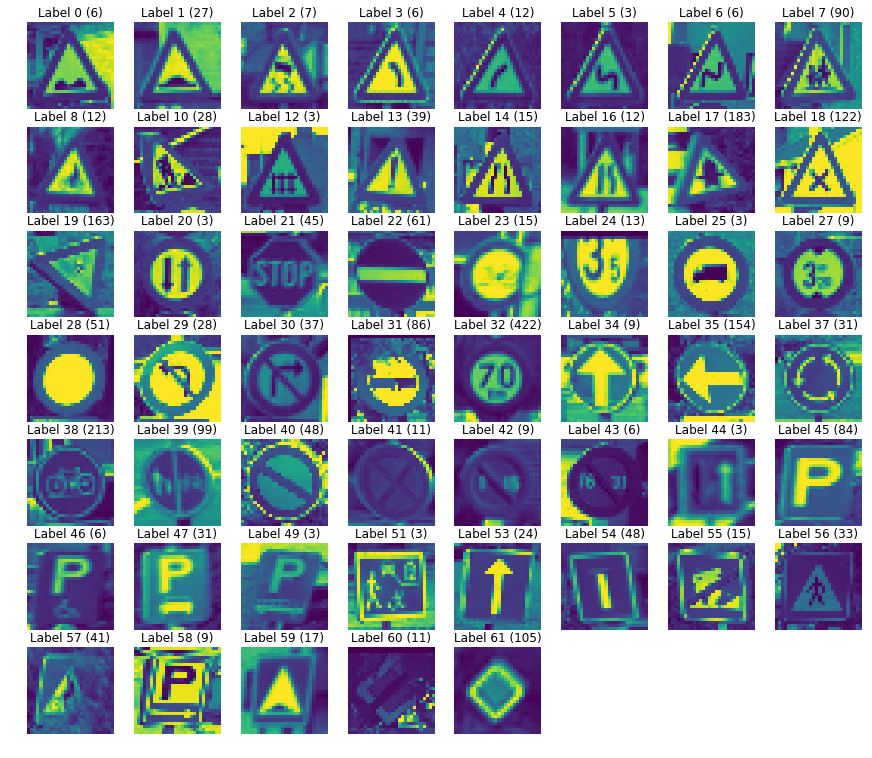

In [165]:
# Transform the images, just like we did with the training set.
test_images28 = [transform.resize(image, (28, 28))
                 for image in test_images]

test_images28 = np.array(test_images28)

test_images28 = rgb2gray(np.array(test_images28))

display_images_and_labels(test_images28, test_labels)


In [169]:
# Run predictions against the full test set.
#predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]
# Calculate how many matches we got.
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
print(match_count)
print(len(test_labels))
accuracy = match_count*1.00 / len(test_labels)

print("Accuracy: {:.3f}".format(accuracy))

1691
2520
Accuracy: 0.671


In [167]:
# Close the session. This will destroy the trained model.
#sess.close()